# Python Exercise: K-Means 1

Analyze generated data from make_blobs
- Set 3 main spots (random_state = 42)
- Plot the data using scatter plot
- Determine the optimal number of cluster based on your
observation
- Plot the data and clustering result (optimal number of cluster) using
scatter plot

In [1]:
# import library

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# set 3 main spots with random_state=42

features, true_labels = make_blobs(
    n_samples=200, centers=3, cluster_std=2.75, random_state=42
)

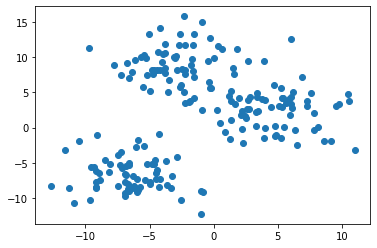

In [3]:
# generate scatter plot

plt.scatter(features[:,0], features[:,1])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


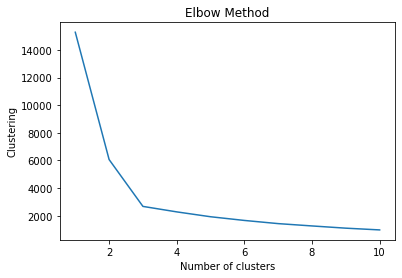

In [4]:
# determine the optimal number of cluster with elbow method

clustering = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    clustering.append(kmeans.inertia_)
plt.plot(range(1, 11), clustering)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Clustering')
plt.show()

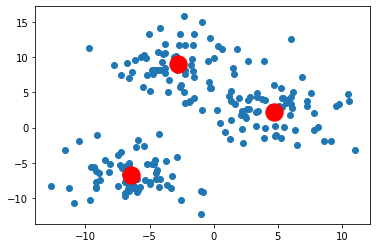

In [5]:
# the optimum number of clusters = 3
# generate scatter plot

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features)
plt.scatter(features[:,0], features[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Python Exercise: K-Means 2

Analyze data “ilustrasi k means.csv”
- Plot the data using scatter plot
- Determine the optimal number of cluster
-- Elbow method
-- Silhouette method
- Plot the data and clustering result (optimal number of cluster) using
scatter plot

In [6]:
import pandas as pd

In [7]:
data = pd.read_csv("ilustrasi k means.csv",sep=";")

In [8]:
data.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


<Figure size 432x288 with 0 Axes>

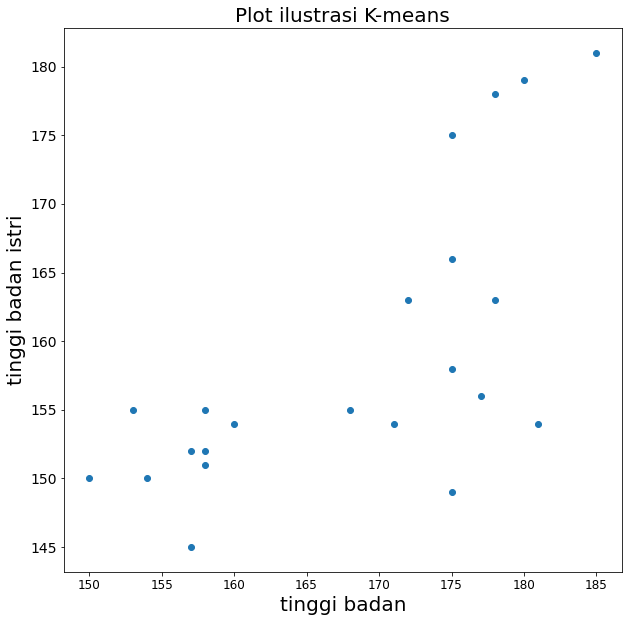

In [9]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('tinggi badan',fontsize=20)
plt.ylabel('tinggi badan istri',fontsize=20)
plt.title("Plot ilustrasi K-means",fontsize=20)
plt.scatter(data['tinggibadan'], data['tinggibadanistri'])

## Elbow Method

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


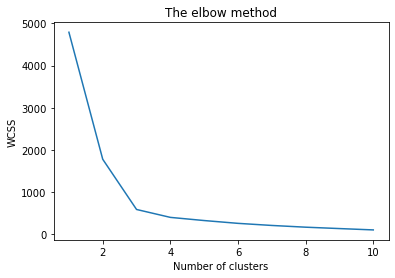

In [10]:
wcss = []

for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans_2.fit(data)
    wcss.append(kmeans_2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans_3 = KMeans(n_clusters=k)
    kmeans_3.fit(data)
    score = silhouette_score(data, kmeans_3.labels_)
    silhouette_coefficients.append(score)

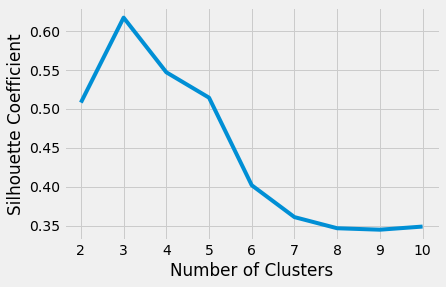

In [13]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [14]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(data)

KMeans(n_clusters=3)

In [15]:
Kmean.cluster_centers_

array([[174.66666667, 157.55555556],
       [179.5       , 178.25      ],
       [156.11111111, 151.55555556]])

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[179.5        178.25      ]
 [156.11111111 151.55555556]
 [174.66666667 157.55555556]]


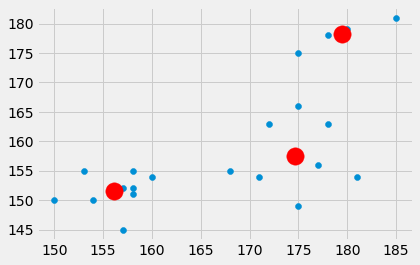

In [17]:
# the optimum number of clusters = 3
# generate scatter plot

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data)
plt.scatter(data['tinggibadan'], data['tinggibadanistri'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

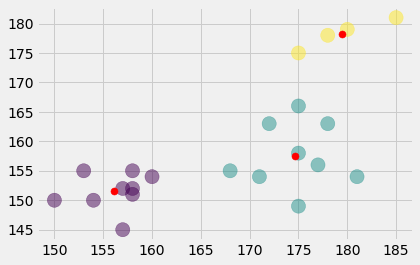

In [18]:
#visualisasi lainnya
plt.scatter(data['tinggibadan'], data['tinggibadanistri'], c= kmeans.labels_.astype(float), s=200, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# Python Exercise: Clustering Agglomerative

Analyze data “ilustrasi k means.csv”
- Plot the data using scatter plot
- Make dendrograms
-- ward linkage
-- average linkage
-- complete linkage
- Compare the result:
-- is it different?
-- what about another data?
- Plot the data and clustering result (optimal number of cluster from either ward,
average, complete) using scatter plot

<Figure size 432x288 with 0 Axes>

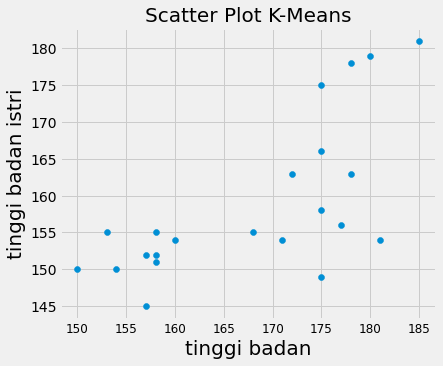

In [22]:
# Plot the data using scatter plot

plt.figure()
plt.figure(figsize=(6,5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('tinggi badan',fontsize=20)
plt.ylabel('tinggi badan istri',fontsize=20)
plt.title("Scatter Plot K-Means",fontsize=20)
plt.scatter(data['tinggibadan'], data['tinggibadanistri'])

## Ward

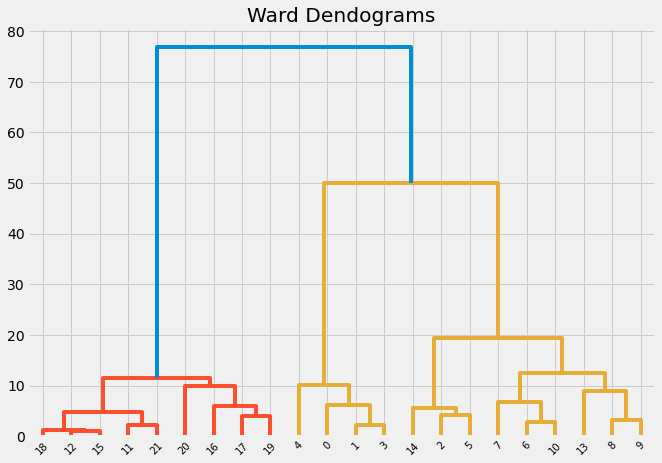

In [33]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Ward Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [51]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data)

array([2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

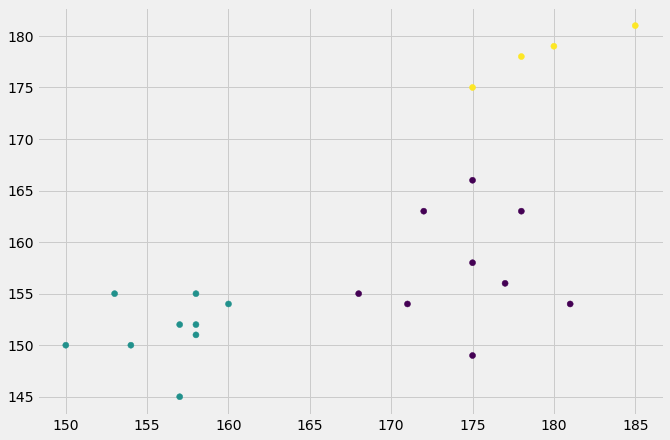

In [52]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['tinggibadan'], data['tinggibadanistri'], c=cluster.labels_) 

## Complete

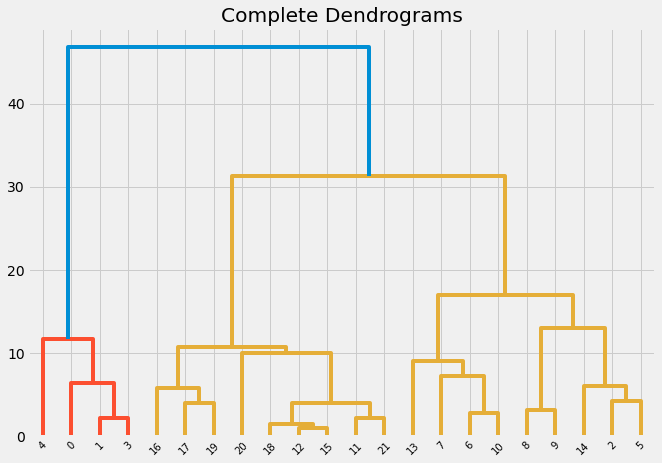

In [43]:
plt.figure(figsize=(10, 7))  
plt.title("Complete Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='complete'))

In [53]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
cluster.fit_predict(data)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

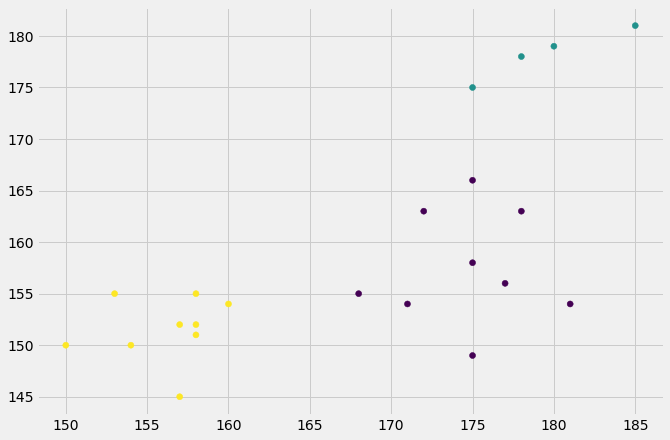

In [54]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['tinggibadan'], data['tinggibadanistri'], c=cluster.labels_)

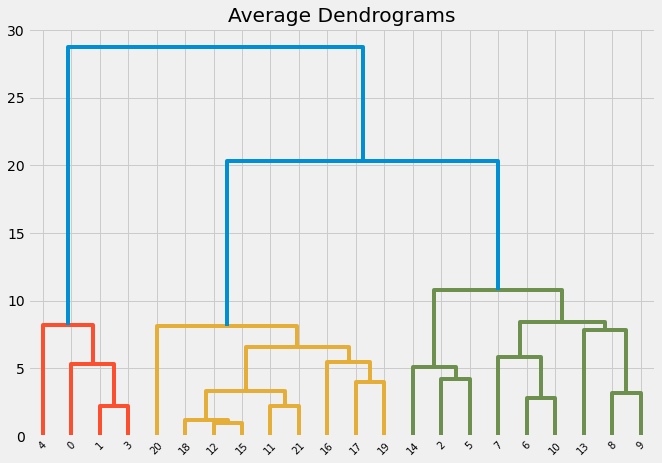

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Average Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='average'))

**Question: Is it different?** yes

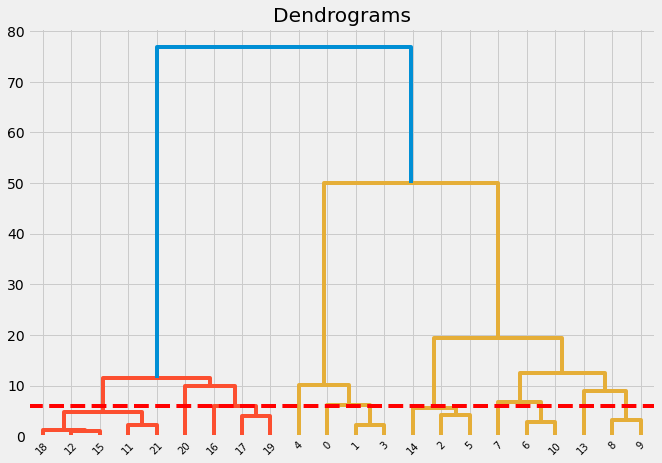

In [47]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

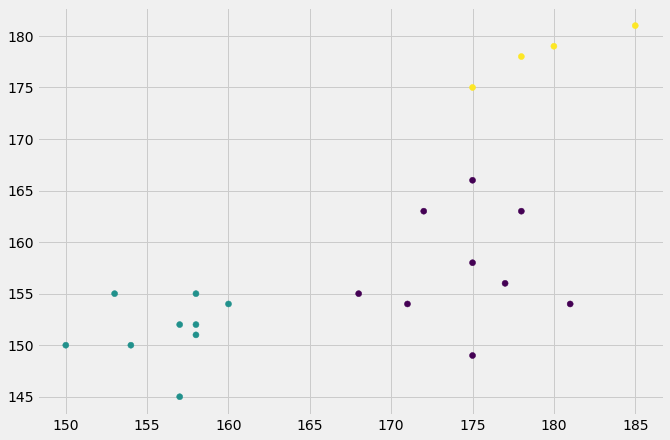